<a href="https://colab.research.google.com/github/ulisses-adonis/.Artificial-neural-network--projects/blob/main/CNN_cinza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
# função shape: fornece uma indicação do número de dimensões na matriz.
x_train.shape

(60000, 28, 28)

essencialmente, o arquivo de treino possui 60 mil imagens e cada imagem tem 28 por 28 pixels.

In [6]:
single_image = x_train[6]

In [7]:
single_image.shape

(28, 28)

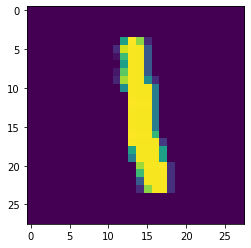

In [8]:
plt.imshow(single_image)

In [9]:
from tensorflow.keras.utils import to_categorical

**to_categorical** : Esta função retorna uma matriz de valores binários ('1' ou '0'). Possui número de linhas igual ao comprimento do vetor de entrada e número de colunas igual ao número de classes.

In [10]:
y_train.shape

(60000,)

In [11]:
y_train[0]

5

há essencialmente 60.000 imagens de números. 


**One Hot Encoding** é um processo que é aplicado a dados categóricos para convertê-los em uma representação vetorial binária para uso em algoritmos de aprendizado de máquina. O que eu faço abaixo, é transformar esse conjunto de números em uma categoria

In [12]:
y_example = to_categorical(y_train)
print(y_example)


[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


essencialmente  a função "to_categorical" converte um vetor de classe de inteiros em uma matriz de classe binária.

In [13]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Note que antes aparecia o número cinco ( categórico)  e agora aparece um binário. Uma posição de índice 5 agora é 1, essencialmente, indicando que pertence ao seu número de classe 5.


In [14]:
y_example.shape

(60000, 10)

O número 10 representa o número de categorias que o conjunto possui, no caso 10. Portanto, neste caso, os números vão de 0 a 9. Portanto, há 10 números possíveis, então 10 categorias reais únicas. O que eu  farei agora, será converter os rótulos de teste e de treinamento em rótulos categóricos ( y_categorical_test e y_categorical_train)

In [15]:
y_cat_test = to_categorical(y_test , num_classes =10)

Acima eu setei o número de classes ( num_classes=10) . Por quê ?
Pode ser que ocorra um caso raro em que, por algum motivo, eu esteja perdendo uma instância de uma classe específica.
Se for esse o caso, eu posso sempre se certificar de que o número de classes é o que eu espero, inserindo manualmente o número de classes.

In [16]:
y_cat_train = to_categorical(y_train,10)

Se eu der uma olhada  meus valores vão de 0 a 255 e eu preciso normalizar esses valores. E para ter certeza de que nao terei nenhum problema de gradiente, eles devem ter uma escala entre 0 e 1. 

In [17]:
single_image.max()

255

In [18]:
single_image.min()

0

Podemos adotar uma abordagem clássica de "S.K. Learn " usando a função min max scalar. 

**Nota**:  quando estivemos usando a função min max ou qualquer semelhante, lembre-se que primeiro nos ajustamos aos dados de treinamento e depois nos transformamos estes, nos dados de teste.


In [19]:
x_train = x_train/255

In [20]:
x_test = x_test/255

**Explicando as ações acima:** Posso supor que  imagens que alimentarei futuramente este 
modelo devem ser dimensionadas como imagens normais entre os valores 0 a 255. 
Portanto, uma maneira fácil de manter instantaneamente todos os valores entre 0 e  1 é simplesmente dividir o conjunto de treinos e testes por 255.


In [21]:
scaled_image = x_train[0]

In [22]:
scaled_image.max()

1.0

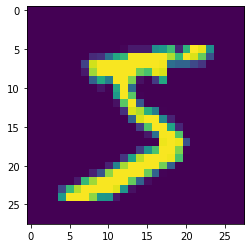

In [23]:
plt.imshow(scaled_image)

Olhando uma imagem em escala.

# Data Processing

Devo reformular os dados agora, e através do comando abaixo, posso concluir que o conjunto de treinamento
é composto de  sessenta mil figuras,  e cada uma delas possui o formato de 28x28. 

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
x_test.shape

(10000, 28, 28)

Esse formato esta correto para uma convolução em sua própria rede, mas preciso adicionar mais uma dimensão para que a rede saiba que estamos lidando com um único canal de cores RGB. 


In [26]:
#batch_size, width, heigth, color_channels
x_train = x_train.reshape(60000,28,28,1)

In [27]:
x_test = x_test.reshape(10000,28,28,1)

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten

#Hidden Layers

Conv1D é usado para seqüências e Conv2D usa para imagens. 

In [30]:
model = Sequential()

O primeiro parâmetro Conv2D necessário é o número de filtros que a camada convolucional aprenderá.

Camadas no início da arquitetura de rede (ou seja, mais perto da imagem de entrada real) aprendem menos filtros convolucionais enquanto camadas mais profundas da rede (ou seja, mais perto das previsões de saída) aprenderão mais filtros.

In [31]:
#kernal_size = os tamanhos típicos de núcleos de imagem são algo na faixa de 2x2 ou 
#4x4. Basicamente é o tamanho do quadrado que scaneia a imagem
model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(28,28,1),activation='relu'))
model.output_shape

(None, 25, 25, 32)

E é muito comum escolher filtros baseados em potências de dois. Portanto, um ponto de partida muito comum para essse filtro poderia ser o número 32. Esse número depende do tamanho do seu conjunto de imagens e , portanto, para nosso conjunto ( 10 categorias) , esse é um número bom. Após sua camada de realização, deve-se ter uma camada de pool.

In [32]:
model.add(MaxPool2D(pool_size=(2,2)))
model.output_shape

(None, 12, 12, 32)

In [33]:
# Após a camada de pooling, devo nivelar(achatar) as imagens em único array. Exemplo : 28x28 = 784
model.add(Flatten())
model.output_shape

(None, 4608)

Após nivelar/ achatar  a imagem,  podemos  começar a adicionar nossas camadas densas. Normalmente as pessoas usam apenas uma camada densa, talvez duas, depois de achatá-la, uma vez que a maior parte do trabalho para dados de imagem  deve ser feit0 pela camada de convolução.

In [34]:
model.add(Dense(128,activation='relu'))

#OUTPUT LAYER SOFTMAX ----> MULTICLASS
model.add(Dense(10,activation='softmax'))
model.output_shape

(None, 10)

Quanto neurônios devemos ter na última camada? 
Neste caso, para um problema de "classificação", devo ter um neurônio por classe, de modo que será uma camada densa com 10 neurônios. E, neste caso, eu também tenho que pensar na minha função de ativação, que deve ser para uma classificação multiclasse e nao para uma classe binária, 

In [35]:
model.compile (loss='categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [36]:
from tensorflow.keras.callbacks import EarlyStopping  

In [37]:
early_stop = EarlyStopping ( monitor='val_loss',patience=1)

In [38]:
model.fit(x_train,y_cat_train,epochs=20,validation_data = (x_test,y_cat_test), callbacks =[early_stop])

Epoch 1/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2817 - accuracy: 0.9151 - val_loss: 0.0568 - val_accuracy: 0.9821
Epoch 2/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0497 - accuracy: 0.9848 - val_loss: 0.0428 - val_accuracy: 0.9847
Epoch 3/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0297 - accuracy: 0.9901 - val_loss: 0.0399 - val_accuracy: 0.9866
Epoch 4/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0434 - val_accuracy: 0.9872


In [39]:
metrics= pd.DataFrame(model.history.history)

In [40]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.139537,0.958267,0.056770,0.9821
1,0.048464,0.984883,0.042800,0.9847
2,0.031485,0.989650,0.039851,0.9866
3,0.021926,0.992600,0.043377,0.9872


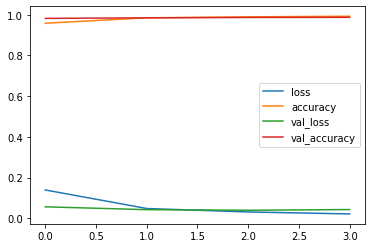

In [41]:
metrics.plot()

Esse gráfico não faz sentindo. Em vez disso, devo traçar a perda para perda de validação e precisão com precisão de validação.

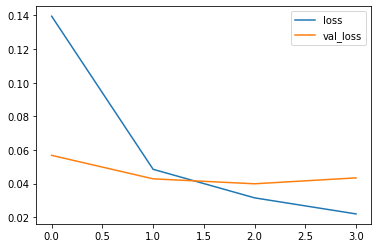

In [42]:
metrics[['loss','val_loss']].plot()


A perda para o conjunto de treinamento está diminuindo, mas a perda associada ao conjunto de validação passa a crescer a partir de um determinado momento. É interessante avaliar a precisão  em relaçao a validação.

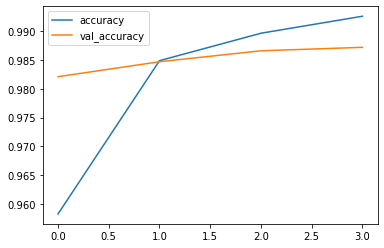

In [43]:
metrics[['accuracy','val_accuracy']].plot()

In [44]:
model.metrics_names

['loss', 'accuracy']

**Loss:** é o resultado da função de entropia cruzada categórica (cross entropy)

Agora vou prever classes algumas informações  baseadas no conjunto de dados de teste x.

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
predictions = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.97      1.00      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [48]:
confusion_matrix(y_test,predictions)

array([[ 978,    0,    0,    1,    0,    0,    0,    0,    1,    0],
       [   0, 1126,    3,    1,    0,    0,    0,    4,    1,    0],
       [   0,    0, 1025,    2,    1,    0,    0,    4,    0,    0],
       [   0,    0,    1, 1007,    0,    0,    0,    0,    2,    0],
       [   0,    0,    2,    0,  977,    0,    0,    0,    0,    3],
       [   2,    0,    1,   13,    0,  873,    2,    0,    0,    1],
       [   8,    1,    1,    1,    6,    3,  937,    0,    1,    0],
       [   0,    0,    8,    0,    0,    0,    0, 1019,    1,    0],
       [   4,    0,    5,    3,    0,    0,    2,    0,  958,    2],
       [   0,    2,    3,    5,   13,    4,    0,   10,    0,  972]])

In [49]:
import seaborn as sns

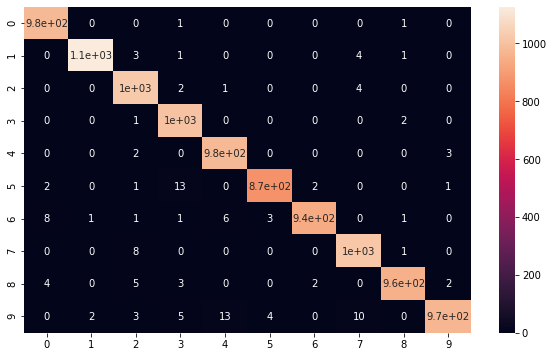

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

##Prediction

Vou testar a previsão de uma imagem.
Então, se alguém mostrar uma imagem de um número( chamarei de meu número), como a rede se comportaria?

Bom , o  modelo prevê classes e então a única coisa da qual estou ciente é que o mesmo deve usar o tamanho do array, para uma análise. 

In [53]:
meu_numero=x_test[0]
x_test[0].shape


(28, 28, 1)

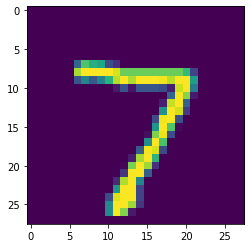

In [54]:
#preciso remodelar  a figura.
plt.imshow(meu_numero.reshape(28,28))

In [57]:
#num_images, width, heigth, color_channels
model.predict_classes(meu_numero.reshape(1,28,28,1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7])

O modelo analisou corretamente. Agora, vou testa outro número qualquer. 

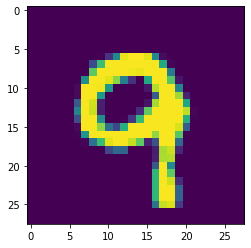

In [61]:
meu_numero=x_test[99]
plt.imshow(meu_numero.reshape(28,28))

In [62]:
model.predict_classes(meu_numero.reshape(1,28,28,1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9])

Perfeito. A rede trabalha com sucesso para imagens em tons de cinza.